In [2]:
#importing libraries

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataframe (df)
df = pd.read_csv('C:/Users/shrey/Downloads/Assignment/16.Neural Networks/gas_turbines.csv')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
# Check for missing values
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

(array([ 236., 1297., 1877., 2005., 1880., 2190., 2278., 1884., 1088.,
         304.]),
 array([ 0.5223 ,  3.96297,  7.40364, 10.84431, 14.28498, 17.72565,
        21.16632, 24.60699, 28.04766, 31.48833, 34.929  ]),
 <BarContainer object of 10 artists>)

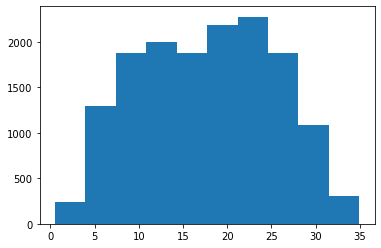

In [9]:
plt.hist(df['AT'])

(array([ 247., 2671.,  474.,  528., 7145.,  462.,  989., 1215., 1160.,
         148.]),
 array([100.17 , 107.614, 115.058, 122.502, 129.946, 137.39 , 144.834,
        152.278, 159.722, 167.166, 174.61 ]),
 <BarContainer object of 10 artists>)

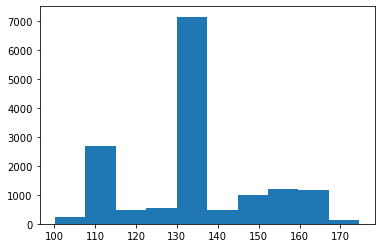

In [10]:
plt.hist(df['TEY'])

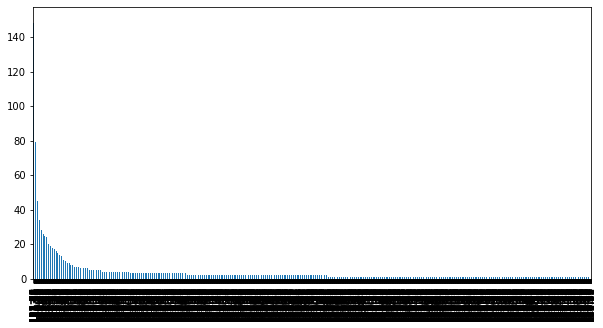

In [6]:
plt.figure(figsize=(10,5))
df.TEY.value_counts().plot.bar();

In [19]:
X = df.drop(columns = ['TEY'], axis = 1) 
y = df.iloc[:,7]

In [20]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [21]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [22]:
# Split dataframe (df) into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [24]:
X_train

array([[-0.0483839 ,  0.34450707, -1.63503785, ..., -0.11636585,
        -0.20134414,  0.55486279],
       [-0.98413494,  2.48787226,  0.38832016, ...,  1.79036542,
        -0.00982807,  0.36421853],
       [-1.16925521,  0.7043421 ,  1.14134212, ...,  1.78945875,
        -0.63261354,  0.9724645 ],
       ...,
       [-0.69954746,  0.54789208, -0.51511826, ...,  1.26540232,
        -0.49556607, -0.24991867],
       [ 1.12133786, -0.32822799, -0.9774989 , ..., -0.46180789,
        -0.39392341, -0.71735444],
       [ 0.10148917, -0.12484298,  0.9484968 , ..., -1.5570677 ,
         1.0584183 , -0.72904033]])

In [25]:
X_test

array([[-0.31495707, -1.98989595, -0.96167113, ..., -0.16885658,
        -0.30900885,  0.78414672],
       [-0.17832388,  1.14044599, -1.54991642, ...,  1.57415885,
        -0.35965411,  0.20970939],
       [ 1.32437538,  0.58531146, -1.55424715, ...,  0.14369037,
        -0.37803708, -0.25874421],
       ...,
       [-0.04474766, -1.48102263,  0.22494895, ..., -0.23317783,
        -0.55472232, -0.26204189],
       [-0.53040688,  0.23064218,  0.53889019, ..., -0.06467426,
        -0.22323534,  0.35004394],
       [ 0.79445658, -0.33991276, -0.58159451, ...,  0.00598853,
        -0.06585426, -0.31333911]])

In [26]:
input_size = len(X.columns)
output_size = 1
hidden_layer_size = 50

model = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                               tf.keras.layers.Dense(output_size)
    
    
                                ])

In [27]:

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])

In [29]:
num_epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/50
339/339 - 2s - loss: 3335.1045 - mean_squared_error: 3335.1045 - val_loss: 187.4164 - val_mean_squared_error: 187.4164
Epoch 2/50
339/339 - 0s - loss: 123.5114 - mean_squared_error: 123.5114 - val_loss: 83.8620 - val_mean_squared_error: 83.8620
Epoch 3/50
339/339 - 0s - loss: 56.5586 - mean_squared_error: 56.5586 - val_loss: 43.7907 - val_mean_squared_error: 43.7907
Epoch 4/50
339/339 - 0s - loss: 28.0838 - mean_squared_error: 28.0838 - val_loss: 20.7871 - val_mean_squared_error: 20.7871
Epoch 5/50
339/339 - 0s - loss: 14.7737 - mean_squared_error: 14.7737 - val_loss: 13.0945 - val_mean_squared_error: 13.0945
Epoch 6/50
339/339 - 0s - loss: 9.1984 - mean_squared_error: 9.1984 - val_loss: 7.6432 - val_mean_squared_error: 7.6432
Epoch 7/50
339/339 - 0s - loss: 5.6203 - mean_squared_error: 5.6203 - val_loss: 4.0561 - val_mean_squared_error: 4.0561
Epoch 8/50
339/339 - 0s - loss: 3.6227 - mean_squared_error: 3.6227 - val_loss: 2.9387 - val_mean_squared_error: 2.9387
Epoch 9/50
3

In [30]:
test_loss, mean_squared_error = model.evaluate(X_test, y_test)

94/94 [==============================] - 0s 798us/step - loss: 0.6573 - mean_squared_error: 0.6573


In [32]:
predictions = model.predict_on_batch(X_test)

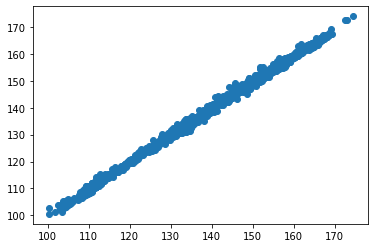

In [33]:
plt.scatter(y_test, predictions)

In [34]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predictions
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,134.06,133.219055,0.627290
1,155.98,155.794098,0.119183
2,133.77,134.489044,0.537523
3,134.02,134.719498,0.521935
4,134.14,133.134262,0.749767
...,...,...,...
3003,112.56,110.844292,1.524261
3004,133.74,133.718597,0.016003
3005,133.23,132.345749,0.663703
3006,134.71,134.800522,0.067198
